# Anomaly Detection code

In [1]:
import numpy as np

def detect_anomalies_z_score(data, threshold=3):
    '''
    Detects anomalies in a 1D array of data using the Z-score method.
    Returns a boolean array indicating which values are anomalies.
    
    Parameters:
        data (array-like): The input data to be analyzed.
        threshold (float): The number of standard deviations from the mean
            above which a value is considered an anomaly. Default is 3.
    
    Returns:
        A boolean array indicating which values are anomalies.
    '''
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    return np.abs(z_scores) > threshold

In [3]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
anomalies = detect_anomalies_z_score(data)
anomalies

array([False, False, False, False, False, False, False, False, False,
       False,  True])

n this advanced class, we have defined an AnomalyDetector class with three methods:

__init__: This is the constructor method that initializes the class with a given random state for the Isolation Forest algorithm.

fit: This method fits the Isolation Forest model to the input data.

predict: This method predicts the anomaly score for each point in the input data.

detect: This method detects anomalies in the input data based on a given threshold.

The detect method returns a boolean mask indicating the presence of anomalies in the data. This allows the user to easily visualize and interpret the results of the anomaly detection algorithm. The user can also specify a threshold value for the anomaly score to customize the sensitivity of the detector.

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Generate some example data
data = np.random.randn(100, 2)

# Initialize the Isolation Forest algorithm
clf = IsolationForest(random_state=0)

# Fit the model to the data
clf.fit(data)

# Predict the anomaly score for each point
scores = clf.decision_function(data)

# Print the scores and corresponding data points
for i, score in enumerate(scores):
    print(f"Data point {i}: anomaly score = {score}")

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np

class AnomalyDetector:
    def __init__(self, random_state=0):
        """
        Initialize the AnomalyDetector class with a given random state.

        Parameters:
        random_state (int): Random seed for the Isolation Forest algorithm.
        """
        self.clf = IsolationForest(random_state=random_state)

    def fit(self, data):
        """
        Fit the Isolation Forest model to the given data.

        Parameters:
        data (np.ndarray): Input data as a numpy array.
        """
        self.clf.fit(data)

    def predict(self, data):
        """
        Predict the anomaly score for each point in the given data.

        Parameters:
        data (np.ndarray): Input data as a numpy array.

        Returns:
        scores (np.ndarray): Anomaly scores for each data point as a numpy array.
        """
        scores = self.clf.decision_function(data)
        return scores

    def detect(self, data, threshold=0):
        """
        Detect anomalies in the given data based on a threshold.

        Parameters:
        data (np.ndarray): Input data as a numpy array.
        threshold (float): Anomaly score threshold for determining outliers. Defaults to 0.

        Returns:
        mask (np.ndarray): Boolean mask indicating the presence of anomalies in the data.
        """
        scores = self.predict(data)
        mask = scores < threshold
        return mask

In [ ]:
import numpy as np

class AnomalyDetector:
    '''
    A class for detecting anomalies in a 1D array of data using the Z-score and IQR methods.
    '''
    def __init__(self, z_threshold=3, iqr_multiplier=1.5):
        '''
        Initializes the AnomalyDetector object with the specified parameters.
        
        Parameters:
            z_threshold (float): The number of standard deviations from the mean
                above which a value is considered an anomaly using the Z-score method.
                Default is 3.
            iqr_multiplier (float): The multiplier for the IQR above which a value is
                considered an anomaly using the IQR method. Default is 1.5.
        '''
        self.z_threshold = z_threshold
        self.iqr_multiplier = iqr_multiplier
    
    def detect_anomalies(self, data):
        '''
        Detects anomalies in a 1D array of data using the Z-score and IQR methods.
        Returns a boolean array indicating which values are anomalies.
        
        Parameters:
            data (array-like): The input data to be analyzed.
        
        Returns:
            A boolean array indicating which values are anomalies.
        '''
        z_scores = self.calculate_z_scores(data)
        iqr_bounds = self.calculate_iqr_bounds(data)
        return (np.abs(z_scores) > self.z_threshold) | ((data < iqr_bounds[0]) | (data > iqr_bounds[1]))
    
    def calculate_z_scores(self, data):
        '''
        Calculates the Z-scores of each value in the data.
        
        Parameters:
            data (array-like): The input data to be analyzed.
        
        Returns:
            An array of Z-scores for each value in the data.
        '''
        mean = np.mean(data)
        std = np.std(data)
        return (data - mean) / std
    
    def calculate_iqr_bounds(self, data):
        '''
        Calculates the lower and upper bounds for identifying anomalies using the IQR method.
        
        Parameters:
            data (array-like): The input data to be analyzed.
        
        Returns:
            A tuple containing the lower and upper bounds for identifying anomalies.
        '''
        quartile1, quartile3 = np.percentile(data, [25, 75])
        iqr = quartile3 - quartile1
        lower_bound = quartile1 - self.iqr_multiplier * iqr
        upper_bound = quartile3 + self.iqr_multiplier * iqr
        return (lower_bound, upper_bound)

In [ ]:
import numpy as np

def detect_anomalies_iqr(data, k=1.5):
    '''
    Detects anomalies in a 1D array of data using the IQR method.
    Returns a boolean array indicating which values are anomalies.
    
    Parameters:
        data (array-like): The input data to be analyzed.
        k (float): The multiplier for the IQR above which a value is
            considered an anomaly. Default is 1.5.
    
    Returns:
        A boolean array indicating which values are anomalies.
    '''
    quartile1, quartile3 = np.percentile(data, [25, 75])
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - k * iqr
    upper_bound = quartile3 + k * iqr
    return (data < lower_bound) | (data > upper_bound)


# MAD

In [ ]:
import numpy as np
from scipy.stats import norm

def detect_anomalies_mad(data, threshold=3.5):
    '''
    Detects anomalies in a 1D array of data using the MAD method.
    Returns a boolean array indicating which values are anomalies.
    
    Parameters:
        data (array-like): The input data to be analyzed.
        threshold (float): The number of MADs from the median above which a value is
            considered an anomaly. Default is 3.5.
    
    Returns:
        A boolean array indicating which values are anomalies.
    '''
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    z_scores = norm.ppf(1 - 0.5 / len(data))
    threshold_mad = mad * threshold / z_scores
    return np.abs(data - median) > threshold_mad

# Anti Money Laundering
Anti-Money Laundering (AML) is a complex topic and requires a variety of techniques and technologies to detect and prevent financial crimes. Here is a basic Python code for implementing AML measures:

In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from datetime import datetime

# Read in transaction data
df = pd.read_csv('transaction.csv')
df = pd.DataFrame(df['account,transaction_date,amount'].str.split(',').to_list(), columns= df.columns[0].split(','))


# Convert transaction date to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Sort by transaction date
df = df.sort_values('transaction_date')

# Calculate time since last transaction for each account
df['time_since_last_transaction'] = df.groupby('account')['transaction_date'].diff().dt.days
df = df.dropna()

# Calculate rolling 7-day transaction volume for each account
df['7_day_transaction_volume'] = df.groupby('account')['amount'].rolling(7).sum().values

# Calculate z-score for 7-day transaction volume for each account
scaler = StandardScaler()
df['7_day_transaction_volume_zscore'] = scaler.fit_transform(df['7_day_transaction_volume'].values.reshape(-1, 1))

# Use KMeans clustering to identify transaction clusters
kmeans = KMeans(n_clusters=3)
df = df.dropna()
df['transaction_cluster'] = kmeans.fit_predict(df[['amount', '7_day_transaction_volume_zscore']].values)

# Use Isolation Forest to detect outliers in transaction clusters
outliers_fraction = 0.01
model = IsolationForest(contamination=outliers_fraction)
df['is_outlier'] = model.fit_predict(df[['amount', '7_day_transaction_volume_zscore']])

# Flag suspicious transactions
df['is_suspicious'] = np.where((df['time_since_last_transaction'] > 7) &
                               (df['7_day_transaction_volume_zscore'] > 3) &
                               (df['is_outlier'] == -1), 1, 0)

# Export suspicious transactions to a CSV file
df[df['is_suspicious'] == 1].to_csv('suspicious_transactions.csv', index=False)


/Users/andishetavakkoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


This code reads in transaction data from a CSV file and performs the following AML measures:

1. Converts the transaction date to a datetime format and sorts the data by date.

2. Calculates the time since the last transaction for each account.
3. Calculates the rolling 7-day transaction volume for each account.
4. Calculates the z-score for the 7-day transaction volume for each account using standard scaling.
5. Uses KMeans clustering to identify transaction clusters based on amount and 7-day transaction volume.
6. Uses Isolation Forest to detect outliers in each transaction cluster.
7. Flags suspicious transactions that meet the following criteria:

   7.1.Time since last transaction is greater than 7 days.
   
   7.2.7-day transaction volume z-score is greater than 3.
   
   7.3. Transaction is identified as an outlier by the Isolation Forest model.
   
8. Exports suspicious transactions to a CSV file.

Note that this code is just a basic implementation and may need to be customized and adjusted for specific AML requirements and regulations.

In [71]:
df.shape

(18, 9)

In [55]:
df.columns.to_list()

['account',
 'transaction_date',
 'amount',
 'time_since_last_transaction',
 '7_day_transaction_volume',
 '7_day_transaction_volume_zscore',
 'transaction_cluster',
 'is_outlier',
 'is_suspicious']

In [53]:
import seaborn as sns
from sklearn.manifold import TSNE

In [72]:
df.shape

(18, 9)

In [73]:
df_tsne = df.drop(columns = ['account','transaction_date','is_outlier','is_suspicious'])


In [74]:
df_tsne.shape

(18, 5)

In [75]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
X_embedded = tsne.fit_transform(df_tsne)

In [76]:
X_embedded.shape

(18, 2)

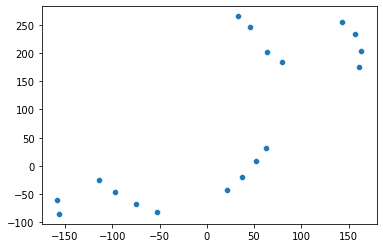

In [78]:
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1]);

In [88]:
# Pyod_Isolation Forest(unsupervised)
# Import necessary libraries
# Generate sample data
n_samples = 300
X_train, y_train, X_test, y_test = generate_data(n_train=n_samples, n_test=n_samples, n_features=1, contamination=0.1)

# Reshape the input data to 2D array
X_train = np.reshape(X_train, (-1, 1))
X_test = np.reshape(X_test, (-1, 1))

# Initialize and fit the model
iforest = IForest(n_estimators=100, contamination=0.1)
iforest.fit(X_train)

# Predict on the test data
y_pred = iforest.predict(X_test)

# Evaluate the model
evaluate_print('IForest', y_test, y_pred)

IForest ROC:0.5, precision @ rank n:0.0


/Users/andishetavakkoli/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Tuning contamination _Isolation Forest

Finally, it is time to tune the notorious contamination parameter. The evaluate_outlier_classifier and evaluate_regressor functions from the video are already loaded for you. You can inspect them below.

In [ ]:
def evaluate_outlier_classifier(model, data):
    # Get labels
    labels = model.fit_predict(data)

    # Return inliers
    return data[labels == 0]

def evaluate_regressor(inliers):
    X = inliers.drop("price", axis=1)
    y = inliers[['price']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    preds = lr.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)

    return round(rmse, 3)

contaminations = [0.07, 0.1, 0.15, 0.25]
scores = dict()

for c in contaminations:
    # Instantiate IForest with the current c
    iforest = IForest(contamination=c, random_state=10)
    
    # Get inliers with the current IForest
    inliers = evaluate_outlier_classifier(iforest, airbnb_df)
    
    # Calculate and store RMSE into scores
    scores[c] = evaluate_regressor(inliers)
print(scores)

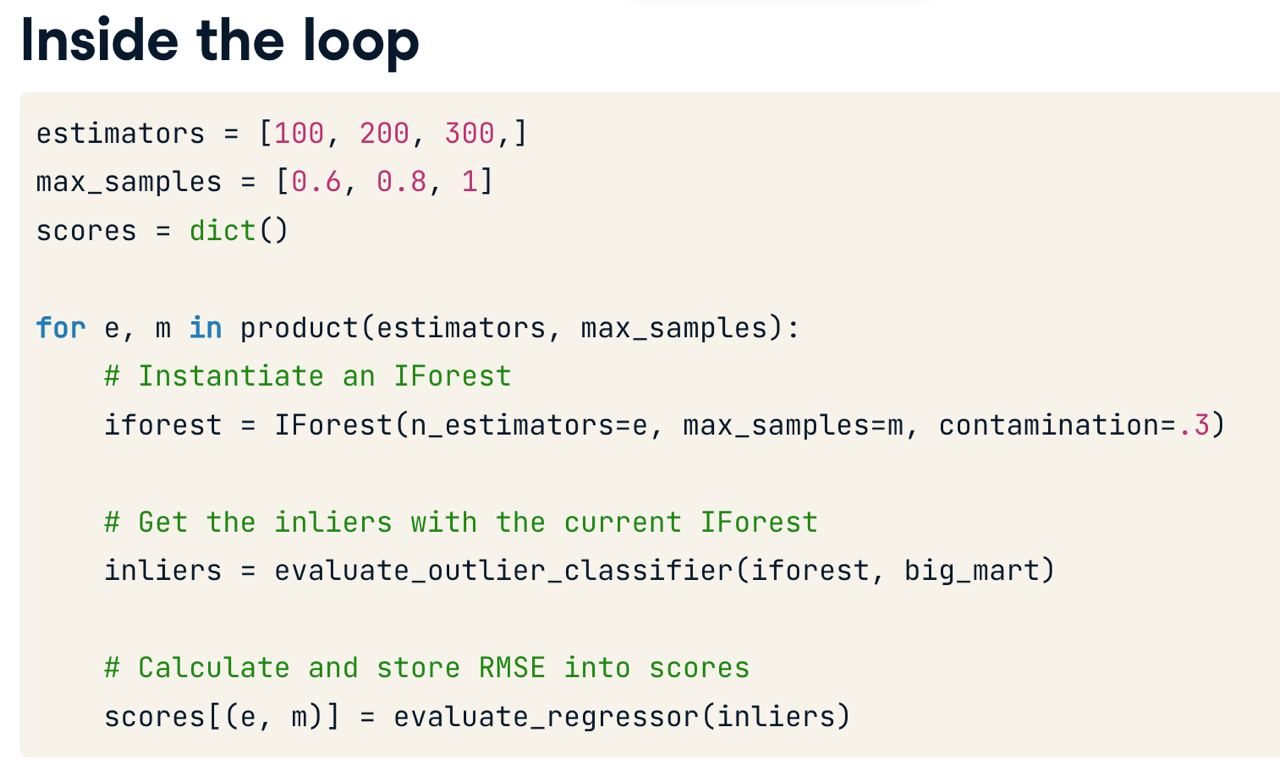